# Lasso and Inductive Conformal Prediction Algorithm

Lasso for sklearn.datasets - load_diabetes

In [1]:
from sklearn.linear_model import Lasso
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

from sklearn.model_selection import train_test_split

load diabetes dataset and splitting dataset using train_test_split in scikit-learn

In [2]:
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
X1_train,X1_test,y1_train,y1_test = train_test_split(X,y,random_state=2610)

Calculating Training and Test_R2 for the Lasso model using the default parameters and different parameters

In [3]:
lasso = Lasso().fit(X1_train,y1_train)
lasso00=Lasso(alpha=0.1,max_iter=100000).fit(X1_train,y1_train)
lasso01=Lasso(alpha=0.01,max_iter=100000).fit(X1_train,y1_train)
lasso02=Lasso(alpha=0.001,max_iter=100000).fit(X1_train,y1_train)
lasso03=Lasso(alpha=0.0001,max_iter=100000).fit(X1_train,y1_train)

The default parameter for Lasso is alpha=1.0 and based on this we need to select iterations which is also a parameter of lasso

In [4]:
s=[]
s.append(lasso.score(X1_test,y1_test))
s[0]

0.31543808091364745

Train R^2 for alpha=0.1

In [5]:
s.append(lasso00.score(X1_test,y1_test))
s[1]

0.45447531348213155

Train R^2 for alpha=0.01

In [6]:
s.append(lasso01.score(X1_test,y1_test))
s[2]

0.4360653072280051

Train R^2 for alpha=0.001

In [7]:
s.append(lasso02.score(X1_test,y1_test))
s[3]

0.4345922057665438

Train R^2 for alpha=0.0001

In [8]:
s.append(lasso03.score(X1_test,y1_test))
s[4]

0.4354764053262594

Calculating how many features does this model use for default parameter and which.

In [9]:
for i in range(X.shape[1]):
    if lasso.coef_[i] != 0:
        print("Feature selected: ",i)

Feature selected:  2
Feature selected:  3
Feature selected:  8


Calculating how many features does this model use for different parameter values

In [10]:
import numpy as np
nz=[]

nz.append(np.sum(lasso.coef_ != 0))
nz.append(np.sum(lasso00.coef_ != 0))
nz.append(np.sum(lasso01.coef_ != 0))
nz.append(np.sum(lasso02.coef_ != 0))
nz.append(np.sum(lasso03.coef_ != 0))
print('Number of selected feature for each alpha=[defalt_parameter,0.1,0.01,0.001,0.0001]: ',nz)

Number of selected feature for each alpha=[defalt_parameter,0.1,0.01,0.001,0.0001]:  [3, 6, 9, 9, 10]


Test R2 vs total number of features used for different alpha 

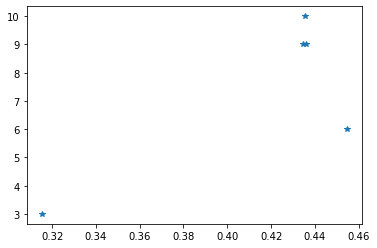

In [11]:
plt.plot(s,nz,'*')
plt.show()

According to above graph the most suitable parameter will be for 0.0001 as it is selecting 10 features out of 10 features and gives the best accuracy of 0.4354764053262594

# Lasso method for diabetes.data (tab separated)

In [14]:
diabetes=pd.read_csv('diabetes.data',sep='\t')
diabetes.shape

(442, 11)

In [15]:
Xd=diabetes.values[:,:-1]
yd=diabetes.values[:,-1]
X_train,X_test,y_train,y_test = train_test_split(Xd,yd,random_state=2610)

Calculating Train and Test R2 for the Lasso model using default parameters and different values of alpha

In [16]:
lasso1 = Lasso().fit(X_train,y_train)
lasso10=Lasso(alpha=0.1,max_iter=100000).fit(X_train,y_train)
lasso11=Lasso(alpha=0.01,max_iter=100000).fit(X_train,y_train)
lasso12=Lasso(alpha=0.001,max_iter=100000).fit(X_train,y_train)
lasso13=Lasso(alpha=0.0001,max_iter=100000).fit(X_train,y_train)

The default parameter for Lasso is alpha=1.0 and based on this we need to select iterations which is also a parameter of lasso

In [17]:
s1=[]
s1.append(lasso1.score(X_test,y_test))

Train R^2 for alpha=0.1

In [18]:
s1.append(lasso10.score(X_test,y_test))

Train R^2 for alpha=0.01

In [19]:
s1.append(lasso11.score(X_test,y_test))

Train R^2 for alpha=0.001

In [20]:
s1.append(lasso12.score(X_test,y_test))

Train R^2 for alpha=0.0001

In [21]:
s1.append(lasso13.score(X_test,y_test))
s1

[0.41290721446465406,
 0.43413994373110765,
 0.4354643080478602,
 0.43559404222290565,
 0.4356068022574697]

Calculating how many features does this model use for default parameter and which

In [22]:
for i in range(Xd.shape[1]):
    if lasso1.coef_[i] != 0:
        print("Feature selected: ",diabetes.columns[i])

Feature selected:  AGE
Feature selected:  SEX
Feature selected:  BMI
Feature selected:  BP
Feature selected:  S1
Feature selected:  S2
Feature selected:  S3
Feature selected:  S4
Feature selected:  S5
Feature selected:  S6


Calculating how many features does this model use for different parameter values

In [23]:
import numpy as np
nz1=[]

nz1.append(np.sum(lasso1.coef_ != 0))
nz1.append(np.sum(lasso10.coef_ != 0))
nz1.append(np.sum(lasso11.coef_ != 0))
nz1.append(np.sum(lasso12.coef_ != 0))
nz1.append(np.sum(lasso13.coef_ != 0))
print('Number of selected feature for each alpha=[defalt_parameter,0.1,0.01,0.001,0.0001]: ',nz1)

Number of selected feature for each alpha=[defalt_parameter,0.1,0.01,0.001,0.0001]:  [10, 10, 10, 10, 10]


Test R2 vs total number of features used for different alpha

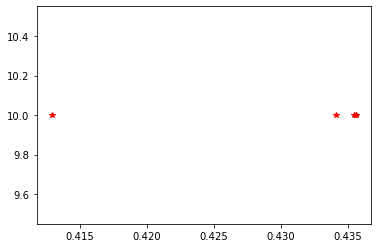

In [24]:
plt.plot(s1,nz1,'r*')
plt.show()

According to above graph the all suitable parameter but 0.0001 is best as it selecting 10 features out of 10 features and gives the best accuracy of 0.4356068022574697]

# Preprocess the training and test sets using StandardScaler

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [26]:
scaler.fit(X_train)

StandardScaler()

In [27]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
lasso2 = Lasso().fit(X_train_scaled,y_train)
lasso2.score(X_train_scaled,y_train)

0.5337864254042757

In [29]:
lasso2.score(X_test_scaled,y_test)

0.44905822102312876

# Choose the regularization parameter for the Lasso using cross-validation on the training set

In [30]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

In [31]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(Lasso(), param_grid)

In [32]:
grid_search.fit(X_train,y_train)

E:\app\New folder\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.768e+03, tolerance: 1.587e+02
  model = cd_fast.enet_coordinate_descent(
E:\app\New folder\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.314e+04, tolerance: 1.463e+02
  model = cd_fast.enet_coordinate_descent(
E:\app\New folder\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.517e+04, tolerance: 1.445e+02
  model 

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]})

In [33]:
grid_search.score(X_train,y_train)

0.536818362103612

In [34]:
grid_search.score(X_test,y_test)

0.43413994373110765

In [35]:
print(grid_search.best_params_)

{'alpha': 0.1}


# Inductive Conformal Predictor

Splitting original training data into new training and calibration data

In [36]:
new_xtrain,xcal,new_ytrain,ycal = train_test_split(X_train,y_train,test_size=0.299,random_state=2610)

Preprossing data using StandardScaler

In [37]:
scaler1 = StandardScaler()
scaler1.fit(new_xtrain)

StandardScaler()

In [38]:
xcal_scaled = scaler1.transform(xcal)
newxtrain_scaled = scaler1.transform(new_xtrain)
test_scaled = scaler1.transform(X_test)

Finding best parameter for Lasso and predicting preprossed calibration data

In [39]:
grid_search1 = GridSearchCV(Lasso(), param_grid)
grid_search1.fit(newxtrain_scaled,new_ytrain)

lasso =Lasso(alpha=grid_search1.best_params_["alpha"])
lasso.fit(newxtrain_scaled,new_ytrain)

y_pred_cal=lasso.predict(xcal_scaled)

E:\app\New folder\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.073e+03, tolerance: 1.027e+02
  model = cd_fast.enet_coordinate_descent(
E:\app\New folder\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.941e+02, tolerance: 9.702e+01
  model = cd_fast.enet_coordinate_descent(


Using non-conformity measure α=|y-y^|

In [40]:
new=[]
for i in range(len(ycal)):
    x=abs(ycal[i]-y_pred_cal[i])
    new.append(x)
new.sort()

k values for significance levels 5% & 20% 

In [41]:
e=0.05
k=(1-e)*(len(xcal)+1)
e1=0.2
k1=(1-e1)*(len(xcal)+1)
print(k,k1)

95.0 80.0


Length of the half of prediction intervals for the test samples

In [42]:
c1=new[int(k-1)]
c2=new[int(k1-1)]
print(c1,c2)

100.67402150143079 72.76203709441307


Predicting for scaled test

In [43]:
yt_pred=lasso.predict(test_scaled)

Calculating prediction intervals for each predicted scaled test 

In [44]:
y_test_interval=[]
y_test_interval1=[]

for i in range(len(yt_pred)):
    y_test_interval.append([yt_pred[i]-c1,yt_pred[i]+c1])
    y_test_interval1.append([yt_pred[i]-c2,yt_pred[i]+c2])

Error rate for y predicted labels for significance level 5%

In [45]:
acc=0
for j in range(len(y_test_interval)):
    if y_test[j]<=y_test_interval[j][1] and y_test[j]>=y_test_interval[j][0]:
            acc=acc+1
accuracy=acc/len(y_test)
error_c1=1-accuracy
print(error_c1)

0.09909909909909909


Error rate for y predicted labels for significance level 20%

In [46]:
acc1=0
for j in range(len(y_test_interval1)):
    if y_test[j]<=y_test_interval1[j][1] and y_test[j]>=y_test_interval1[j][0]:
            acc1=acc1+1

accuracy2=acc1/len(y_test)
error_c2=1-accuracy2
print(error_c2)

0.23423423423423428
